In [1]:
import cv2, pickle, numpy, socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

In [2]:
sock.connect(('192.168.225.129', 7071))

In [3]:
import struct

In [4]:
data = b""
metadata_size = struct.calcsize('Q')
metadata_size

8

In [15]:
while len(data) < metadata_size:
    packet = sock.recv(4*1024) 
    if not packet:
        break
    data += packet
packed_msg_size = data[:metadata_size]
print(packed_msg_size)
data = data[metadata_size:]
print(data)
msg_size = struct.unpack("Q",packed_msg_size)[0]

while len(data) < msg_size:
    data += sock.recv(4*1024)
frame_data = data[:msg_size]
data  = data[msg_size:]
frame = pickle.loads(frame_data)

b'\xa5\x00\x0c\x00\x00\x00\x00\x00'
b'\x80\x04\x95\x87\x00\x00\x00\x00\x00\x00\x00\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01M\x00\x02M\x00\x02K\x03\x87\x94h\x03\x8c\x05dtype\x94\x93\x94\x8c\x02u1\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01|\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89B\x00\x00\x0c\x00\x06\x07\x05\n\x0b\x07\n\x0c\x06\n\x0b\x07\x05\x06\x04\x02\x02\x02\x01\x01\x01\x01\x01\x01\x00\x00\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x05\x06\x04\n\x0b\t\x0b\x0c\x08\x0c\x0e\x08\x0f\x0f\t\x11\x10\x0c\x0f\x11\x0b\x0f\x11\x0b\x0f\x10\x07\x10\x10\n\x10\x11\x0f\x11\x12\x0e\x11\x11\x0b\x10\x10\n\x0f\x11\x0b\x10\x10\n\x0e\x10\n\x0e\x10\n\x10\x10\n\x0e\x10\n\x0e\x10\n\n\x0c\x06\x0c\x0e\x08\x0e\x0f\x0b\x0f\x10\x0c\x11\x12\x10\x0b\x0c\n\x02\x03\x01\x05\x06\x02\n\x0c\x06\x0b\r\x07\x06\x07\x05\x02\x02\x02\x01\x01\x01\x01\x0

In [9]:
import matplotlib.pyplot as plt

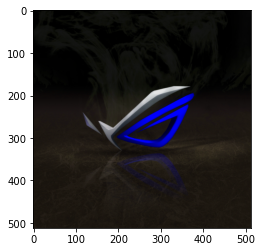

In [11]:
plt.imshow(frame)